<a href="https://colab.research.google.com/github/kedar5/FakeNewsDetection/blob/main/FakeNewsDetection_RF_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Fake News Detection**

Name:  Kedar Deshpande

Andrewid: ksdeshpa

## **Overview**

Over the years, the society has increasingly consumed news on social Media sites like Facebook, Twitter, Youtube, Instagram etc. Social Media companies have been under intense scrutiny to stem the flow of fake and misleading information/news on their websites. The simplest approach to this problem is creating a fake news detection system that can help classify the news articles and flag it. NLP methods to detect fake news have consistently improved over time and we want to explore some methods to build our own model. With available labeled datasets, we want to build an NLP classification model to determine if a new article is fake.

We believe that this kind of system will be a great value add to any platform that allows users to share news articles published on a different website. Even a small tag indicating that a news article might be fake, allows the user to view the article from a different perspective.


## **Our Target Customer**

Our aim is to build a classification model that can help identify fake news articles. With this classification, we want to provide consumers of news articles with an indication that the news that they are reading might be fake. 

Our target users are mainly divided into two categories:
1. Web Browser Plugin developers that allow users to download their plugin to be used on any website to indicate if a particular article/text may be fake
2. Social Media websites that allow users to share news articles that may originate from websites that have satire based news articles or click bait articles. Platforms like Facebook and Twitter allow users to share links for articles and our model, can be used by these companies to create a new feature that allows users to see if a shared post may be fake or not through smart tagging. 

We use the below illustration to show how the model output can probably be indicated on the UI for user to know that the news article might be fake with a small yellow dot.

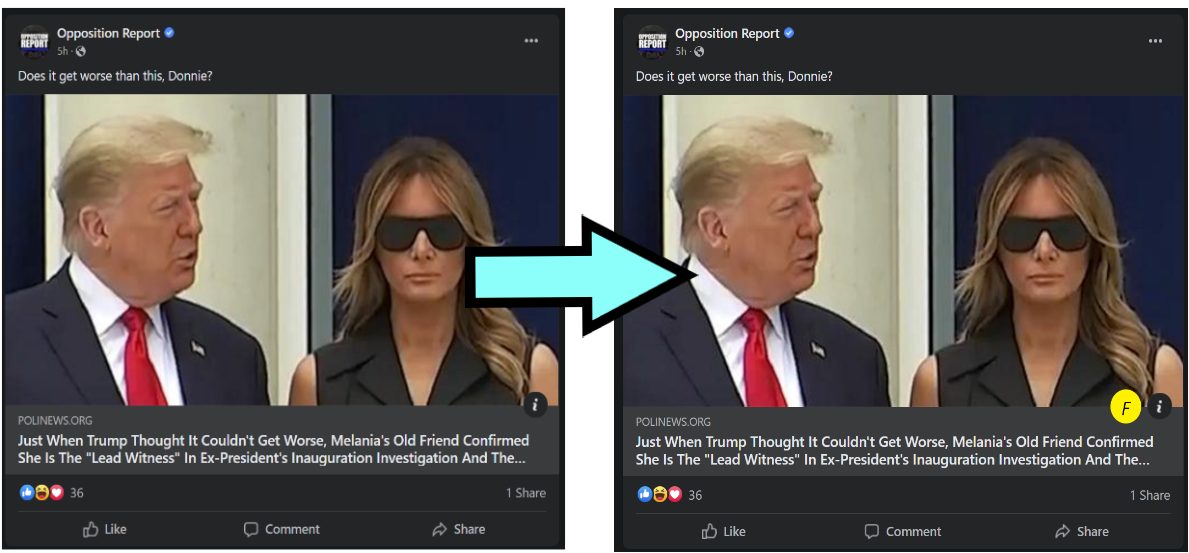

## **Type of learning that we have investigated**

One of the most challenging problems in ML is one that deals with Natural Language Processing. We have explored supervised learning techniques for a classificatioon problem. Specifically, we looked into Random Forest Classifier and LSTM based Classifer to detect Fake news. The Random Forest Model provides and explainable approach as compared to the LSTM model and we discuss the pros and cons of using both these models later. 

## **The domain of the problem we are trying to solve and identifying the T, P, and E. Discussion on how we assessed our work (the P part)**

The Domain that we plan to investigate is NLP classification to detect fake news using a supervised approach. 

The Task ‘T’ is identifying whether a piece of text is fake or not.
The Experience ‘E’ will come from the trained model with labeled data.
The Performance ‘P’ will be measured as the accuracy of classifying unseen data as fake. 

In order to determine news as real or fake, we will be making use of a number of models for Classification like:

- Random Forest model
- LSTM Model - using transfer learning from GloVe Embeddings

The best measure of performance for classification models would be to measure classification accuracy, precison, recall and F1 scores. We want to focus on reducing false positives since we want to avoid wrongly classifying fake news as "real" for each of the models.
But in this case, we also want to reduce the number of false negatives which would classify an article with real fact based news as false. 

We find that in this special case, the importance of one kind of error may not be more important than the other. It is in the best interest to reduce both. We understand that maybe in news articles which discuss Covid or election related information, both false negatives and false positives are undesirable. This is why we try to look at improving both precision and recall. We also discuss measure to overcome to overcome this issue programmatically later. 

## **Motivation for this work**

A little under half (48%) of U.S. adults say they get news from social media “often” or “sometimes” (https://www.pewresearch.org/journalism/2021/09/20/news-consumption-across-social-media-in-2021/). Most social media posts about news contain a couple of headlines and a link that then leads to a news article. With the current overhaul of Twitter by Elon Musk, the midterm elections in the United States and multiple world events capturing the attention of audiences around the world, it is important to have a way to curb the spread of misinformation. After removing the barriers for getting verified on Twitter, the amount of misinformation on Twitter has exponentially increased leading to repercussions on the global stock market as well. According to this article, https://mashable.com/article/twitter-fake-verified-posts-worse-elon-musk the number of fake accounts has risen and this has led to a downward spiral much more dangerous than anything we have seen before. 

At this time, even a small tag or indication that a news article “might be fake” will really help consumers. We believe that by providing such information to the users, the platforms can put some power in the hands of the user to decide whether they want to believe a particular piece of information. The warning could potentially curb the rampant spread of information. One step further, the platforms can limit the resharing of news article links that are tagged as possibly fake.

## **Briefly discuss the data you plan to use. Where did you find it? What is its structure?**


There are multiple datasets available online and we have decided to experiment on 2 different datasets:



1.  Dataset 1: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv
>* This source has 2 files  - one file containing “real” articles and another file containing “fake” news articles.<br>
>* The real news file has 21,192 unique articles and the fake news file has 22851 unique articles.<br> 
>* The dataset is very basic as it just contains the Article title, the article text content and Date of the article.<br>
>* We aim to feature engineer and extract other features that might help with our classification.


 
2.   Dataset 2: https://www.kaggle.com/datasets/mrisdal/fake-news
>* The data from this source contains text and metadata from 244 websites and represents 12,999 posts in total from the webhose.io API, with 12,999 unique values.<br>
>* The dataset contains the author, publish date, news title. article text, language, site url, article type, and a label to indicate real or fake for verification.<br> 

On exploration of the datasets, we noticed that the first dataset is much better suited to our needs due to the following reasons:
1. Higher number of data points (~45k records in Dataset 1 and ~2k records in Dataset 2)
2. More Variety of data points (Since there are more data points and we have a subject column, we can say that the first dataset has more variability in the data which is better for ML models)

Thus, we have implemented all our work for the first dataset

## **Exploratory Data Analysis**

We first perform some EDA to understand the data better

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import re
import string

import nltk

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Embedding,LSTM,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation

Reading the dataset: There are two different files for real and fake datasets so we read both individually compare them and then combine them

In [ ]:
fakedataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake.csv")
realdataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv")

In [ ]:
fakedataset.shape

(23481, 4)

In [ ]:
realdataset.shape

(21417, 4)

From the shape of the 2 datasets, we see that the number of fake and real articles are not very highly imbalanced. There is a difference of about 2000 articles but we do not consider this as class imbalance. We then view the datasets to see what columns exist

In [ ]:
fakedataset.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
realdataset.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
def get_count_percentages(df,column_name):
  ''' function to get the value counts and percentages for a particlua rcolumn from the dataframe df'''

  df_temp = df[column_name].value_counts()
  out= df[column_name].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
  df_temp=pd.concat([df_temp,out],axis=1)
  df_temp.columns=['count','percentage']
  df_temp = df_temp.reset_index().rename(columns={'index':column_name})
  return df_temp

In [ ]:
get_count_percentages(fakedataset, "subject")

,subject,count,percentage
0,News,9050,38.5%
1,politics,6841,29.1%
2,left-news,4459,19.0%
3,Government News,1570,6.7%
4,US_News,783,3.3%
5,Middle-east,778,3.3%


In [ ]:
get_count_percentages(realdataset, "subject")

,subject,count,percentage
0,politicsNews,11272,52.6%
1,worldnews,10145,47.4%


We see that there is actually no similarity in how the news articles are classified wrt subject in the two datasets. Thus we decide to drop the column in further analysis. 

We also decided to drop the date column since we are doing a pure NLP based analysis for the detection and we do not have external data that can help link date related data with external events that may have effected if a news article is fake. 

In [ ]:
realdataset['text_length']  = realdataset['text'].str.len()
realdataset['title_length']  = realdataset['title'].str.len()

fakedataset['text_length']  = fakedataset['text'].str.len()
fakedataset['title_length']  = fakedataset['title'].str.len()

realdataset.describe()

,text_length,title_length
count,21417.000000,21417.000000
mean,2383.278517,64.667881
std,1684.835730,9.168999
min,1.000000,26.000000
25%,914.000000,59.000000
50%,2222.000000,64.000000
75%,3237.000000,70.000000
max,29781.000000,133.000000


In [ ]:
fakedataset.describe()

,text_length,title_length
count,23481.000000,23481.000000
mean,2547.396235,94.198032
std,2532.884399,27.184433
min,1.000000,8.000000
25%,1433.000000,77.000000
50%,2166.000000,90.000000
75%,3032.000000,105.000000
max,51794.000000,286.000000


We comapre the average length of the title and text in real and fake datasets to see if there is any significant difference between the two .We see that for the fake data points, the length of the article is on avergae longer thant he real articles by around 160 words. The title of fake articles also seem to be longer than for real articles with a higher standard deviation. The mean length of title for fake articles is 94 words whereas for real articles, it is 64 words. 

### **Merging the Datasets**

Here we merge the two datasets and take a sample of 10,000 articles to make our analysis a little bit quicker and help train our models faster. There is also another reason to sample the datset described a few cells below.

In [ ]:
# Assigning the classes
realdataset["class"] = 1
fakedataset["class"] = 0

In [ ]:
combined_dataset = pd.concat([realdataset,fakedataset])
combined_dataset.shape

(44898, 7)

We combine the title and the text of the news article so they are easy to analyze

In [ ]:
data_10 = combined_dataset.sample(n=10000)
data_10["text"] = data_10["title"] + " " + data_10["text"]

data_10 = data_10.drop(["subject", "date", "title"], axis = 1)

In [ ]:
# deleteing the unnecassry datsets now to be efficent in space management
# del realdataset, fakedataset, combined_dataset

Since we concatenated the two datasets there might some internal ordering of the data points. To get rid of this, we do 2 things, first is to sample the dataset which we did above. Second, is to explicitly shuffle the dataset, which we are doing below. Shuffling the data ensures model is not overfitting to certain pattern duo sort order.

In [ ]:

dataset = data_10.sample(frac=1).reset_index(drop=True)

Before doing any more data analysis, we clean the dataset to improve our analysis.

For NLP related tasks, cleaning the dataset involves:
1. Removing Stopwords - Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. 

2. Removing html from text - Most articles are scraped from the web. This means that while scraping, the scraper might have automatically included html tags in our text like "<html>" or "<body>" and we should remove this to have a cleaner data to analyse 

3. Removing URLs - URLs in our text indicates that the news articles had a link to an external page. Since we are doing an NLP analysis, we want to remove the number of links present in the text.

4. Removing Square brackets - Usually square brackets are left behnd after removing URLs since URLs are enclosed within square brackets usually. So we remove those extra square brackets

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


In [ ]:
def remove_stopwords(text):
    final_text = [word.strip() if word.strip().lower() not in stop else "" for word in text.split() ]
    return " ".join(final_text)

In [ ]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
def clean_text(text):
    text = remove_stopwords(text)
    text = remove_html(text)
    text = remove_urls(text)
    text = remove_square_brackets(text)
    return text

In [ ]:
dataset['text'] = dataset['text'].apply(clean_text)

In [ ]:
dataset.head(5)

,text,text_length,title_length,class
0,SHOCKING REPORT: 99.5% Professors Top 50 Lib...,2726,114,0
1,Theresa Maybe? PM refuses say she'd vote an...,2821,76,1
2,Zakharova Slams CIA Chief Pompeo: Stop Making ...,5594,69,0
3,"OBAMA HIDING CRIMINAL Records 86,000 ILLEGAL...",4242,130,0
4,UNHOLY ALLIANCE: Hillary Clinton’s Saudi Spons...,15512,87,0


**WordCloud for Fake News**

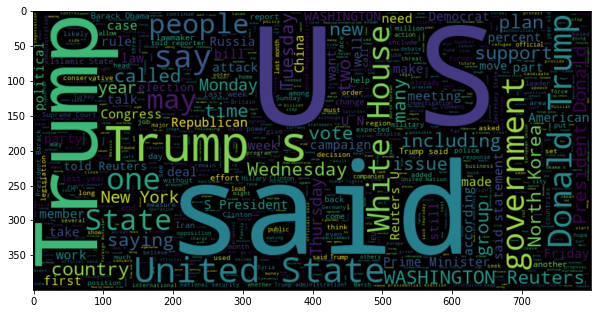

In [ ]:
plt.figure(figsize = (10,10)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 800 , height = 400).generate(" ".join(dataset[dataset["class"] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

**WordCloud for Real News**

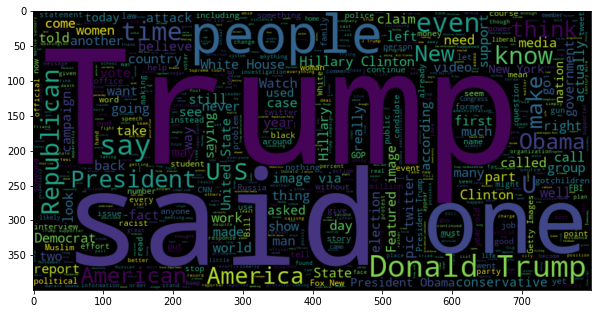

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 800 , height = 400).generate(" ".join(dataset[dataset["class"] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

WordClouds are an indiacation of highest frequency words in the articles. As we can see, these articles in the dataset we have chosen seem to have a  lot of actricles around Trump. He features in both the word clouds very priminently. It is not advisable to draw any conclusions fromt hese wordclouds but they do provide an interesting visual aspect to the words in our dataset.  

## **Data Transformation**

We now define the input columns and the target columns for our analysis and split the dataset into training and testing. We have taken the test size to be 30% of our dataset i.e 3000 data points and the trainign dataset will be 70% of the dataset. 

In [ ]:
X = dataset[['text']]
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X.text,y, test_size=0.3, random_state=42)

In [ ]:
X['text'].str.len().describe()

count    10000.000000
mean      2053.524400
std       1723.694766
min          1.000000
25%       1059.000000
50%       1817.000000
75%       2550.000000
max      42664.000000
Name: text, dtype: float64

In NLP, to train the models, we must tokenize the text. Tokenization is the process of representing the text via numbers. The word_index property of the tokenizer maintains the mapping which can show us which word has been mapped to which number. The following code is commented to indicate what is happening in each line

In [ ]:
# Max_features indicates the max number of words that we must keep based on word_frequency;
# we choose the number 10,000as we have a large dataset and each article on avergae has about 2.5k words
# by estimation, we are assuming that about 10,000 of them occur frequently. 

max_features = 10000

tokenizer = text.Tokenizer(num_words=max_features)

# Updates internal vocabulary based on a list of texts
tokenizer.fit_on_texts(X_train)

# Transforms each text in texts to a sequence of integer; 
# Only words known by the tokenizer will be taken into account hence the fit_on_texts is importnat to be run before this
tokenized_train = tokenizer.texts_to_sequences(X_train)

# max len is used to ensure that all the text articles are reduced to
# the same length so that we have uniform length texts
# texts that are longer are truncated. 
# we take the number 1800 since we can see above that the 50th percentile for the length of the articles 
# after data cleaning is about 1.8k 

maxlen = 1800
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

# we do the same for the test
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

6252    0
4684    1
1731    1
4742    1
4521    0
       ..
8014    1
1074    0
3063    0
6487    0
4705    0
Name: class, Length: 3000, dtype: int64

## **What is GloVe?**

Please refer to this article which was heavily referenced during this work:
https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010


GloVe (Global Vectors) is a word vector technique. Word vectors put words into a vector space, where similar words cluster together and different words repel.
The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. 



## **Why use GloVe? How is it useful in our case?**

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [ ]:
#Learning Rate Reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2,
                                            verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
len(X_train[0])

1800

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} \n Recall: {} \n F1-Score: {} \n Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))



Precision: 0.788 
 Recall: 0.673 
 F1-Score: 0.726 
 Accuracy: 0.756


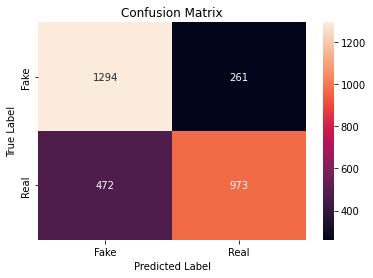

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_label = ['Fake', 'Real']
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
        #elif c == 0:
        #    annot[i, j] = ''
        else:
            annot[i, j] = '%.2f%%\n%d' % (p, c)
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

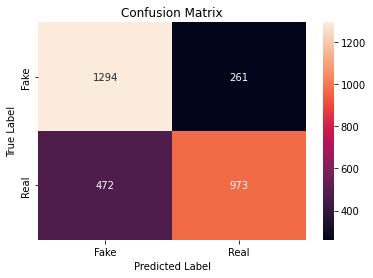

In [ ]:
# Making the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# class_label = ['Fake', 'Real'] 



In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.73      0.83      0.78      1555
        True       0.79      0.67      0.73      1445

    accuracy                           0.76      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.76      0.75      3000



In [ ]:
input_layer = Input(shape=(len(X_train[0]),))
first_embedding = Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False)(input_layer)
first_LSTM = LSTM(units=128, return_sequences = True, recurrent_dropout = 0.25, dropout = 0.25)(first_embedding)
second_LSTM = LSTM(units =64, recurrent_dropout = 0.1, dropout = 0.1)(first_LSTM)
first_dense = Dense(units = 32, activation='relu')(second_LSTM)
second_dense = Dense(units = 1, activation = 'sigmoid')(first_dense)

model = Model(inputs= input_layer, outputs=second_dense)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1800)]            0         
                                                                 
 embedding (Embedding)       (None, 1800, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 1800, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainab

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1800)]            0         
                                                                 
 embedding (Embedding)       (None, 1800, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 1800, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainab

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
             loss={'dense_1': 'binary_crossentropy'}, #change the names based on model summary above
             metrics={'dense_1': 'accuracy'})

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size,
                    validation_data = (X_test,y_test), epochs = epochs,
                    callbacks = [learning_rate_reduction])

Epoch 1/10


In [ ]:
print("Training Accuracy - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Testing Accuracy - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred_prob = model.predict(X_test)>0.5
pred = pred_prob*1
conf_mat = confusion_matrix(y_test,pred)
conf_mat = pd.DataFrame(conf_mat , index = ['Fake','True'] , columns = ['Fake','True'])

plt.figure(figsize = (5,5))
sns.heatmap(conf_mat, annot = True, fmt='d' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")